# Solution tRAT 5

---
---

**Author:** Dr Giordano Scarciotti (g.scarciotti@imperial.ac.uk) - Imperial College London

**Module:** ELEC70066 - Applied Advanced Optimisation

**Version:** 1.1.1 - 13/02/2025

---
---

# Exercise

The classical Markowitz portfolio optimisation problem is
naturally expressed as a bi-criterion minimisation problem, where the objectives are the negative mean return (since we wish to maximize mean return) and the variance of the return

$$
\begin{array}{ll}
\min & (-\bar{p}^\top x,x^\top \Sigma x )\\
s.t. & \mathbf{1}^\top x =1, \\ &x\succeq 0.\end{array}
$$

where $\bar{p}$ is the price mean and $\Sigma$ is the covariance. The two constraints express that $x$ indicates the normalised fraction of investement put into each asset (so the components of $x$ must sum to $1$) and the fact that we do not allow negative investments, called *shorts*. We scalarize the problem using the parameter $\lambda$

$$
\begin{array}{ll}
\min & -\bar{p}^\top x + \lambda x^\top \Sigma x \\
s.t. & \mathbf{1}^\top x =1, \\ &x\succeq 0\end{array}
$$

The parameter $\lambda>0$ is called *risk aversion parameter*. The objective $-\bar{p}^\top x + \lambda x^\top \Sigma x$ is called *risk-adjusted return*.

Consider a simple portfolio optimization problem with
$4$ assets, with price mean and covariance given in the code below.

In [ ]:
import numpy as np
import cvxpy as cp
n = 4
bar_p = np.array([0.12,0.1,0.07,0.03])
Sigma = np.zeros((n,n))
Sigma[0,0]=0.2*0.2
Sigma[1,1]=0.1*0.1
Sigma[2,2]=0.05*0.05
Sigma[3,3]=0

Note that asset $4$ is risk-free with certain $3\%$ return. The other assets have incresing return, ranging from $7\%$ to $12\%$, as well as increasing risk, ranging from $5\%$ to $20\%$.

1.    Construct the Pareto optimal curve for $\lambda \in [0.01,1000]$ (use a logarithmic spacing with 100 points). The plot should have $\bar{p}^\top x_{opt}$ (mean return) on the $y$ axis and $\sqrt{x_{opt}^\top \Sigma x_{opt}}$ (standard deviation) on the $x$ axis.
2.    Explain the meaning of the left-most point of the Pareto optimal curve.
3.    Explain the meaning of the right-most point of the Pareto optimal curve.
4.    For each of the following points ($+/- 0.001$) in the plot, establish and explain whether they are optimal, non-optimal or infeasible:
    *    Standard deviation: $0.1$, Mean return: $0.108$
    *    Standard deviation: $0.05$, Mean return: $0.12$
    *    Standard deviation: $0.12$, Mean return: $0.05$

# Solution

In [ ]:
#Declare the values for lambda, the variable and the objectives
samples = 100
lmb_vals = np.logspace(-2, 3, num=samples)

p = cp.Variable(n)
ret = bar_p.T@p
risk = cp.quad_form(p, Sigma)

In [ ]:
#Solve the problem for all values of lambda
risk_data = np.zeros(samples)
ret_data = np.zeros(samples)

for i in range(samples):
  prob = cp.Problem(cp.Maximize(ret - lmb_vals[i]*risk),[cp.sum(p) == 1,p >= 0])
  prob.solve()
  risk_data[i] = cp.sqrt(risk).value
  ret_data[i] = ret.value

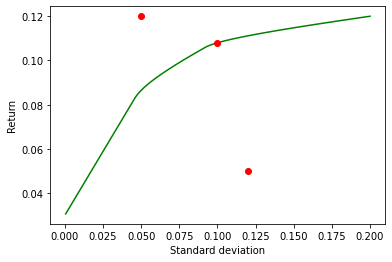

In [ ]:
# Plot the optimal trade-off curve.
import matplotlib.pyplot as plt

plt.plot(risk_data, ret_data, 'g-')
plt.plot(0.1,0.108,"ro")
plt.plot(0.05,0.12,"ro")
plt.plot(0.12,0.05,"ro")
plt.xlabel('Standard deviation')
plt.ylabel('Return')
plt.show()

*   The left-most point correspond to $0$ risk and $3\%$ return. So this corresponds to investing only in asset 4 and indicates a completely risk-averse approach.
*   The right-most point correspond to $20\%$ risk and $12\%$ return. So this corresponds to investing only in asset 1 and indicates a greedy high risk-tolerant approach.
*   The point $(0.1,0.108)$ is on the trade-off curve, so it is pareto optimal.
*   The point $(0.05,0.12)$ is above the trade-off curve. This point is not achievevable, so it correspond to an infeasible point.
*   The point $(0.12,0.05)$ is below the trade-off curve, so it is suboptimal. For instance the point $(0.12,\approx 0.11)$ achieves more return for the same risk, while the point $(\approx 0.025, 0.05)$ achieves the same return but for less risk.
